# Introduction

The telecommunications sector has become one of the main industries in
developed countries. The technical progress and the increasing number of
operators raised the level of competition. Companies are working hard to survive
in this competitive market depending on multiple strategies. 

Three main strategies have been proposed to generate more revenues:
 1 Acquire new customers
 2 Upsell the existing customers
 3 Increase the retention period of customers
 
However, comparing these strategies taking the value of return on investment
(RoI) of each into account has shown that the third strategy is the most profitable
strategy, proving that retaining an existing customer costs much lower than
acquiring a new one, in addition to being considered much easier than the
upselling strategy. To apply the third strategy, companies have to decrease the
potential of customer’s churn, known as "the customer movement from one
provider to another".

Customer churn is a considerable concern in service sectors with high
competitive services. On the other hand, predicting the customers who are likely
to leave the company will represent a potentially large additional revenue source
if it is done in the early phase.

Many research confirmed that machine learning technology is highly efficient to
predict this situation. This technique is applied through learning from previous
data.

### Step - 1: Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('churn_dataset.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
## Dimensionality check

df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

### Observation - Here we can see the dataset contains rows- 7043 and columns- 21 using shape parameter

In [6]:
## Column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## Checking null values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df = df.dropna()

### Observation - Here we can see the dataset contains no null values

In [9]:
## Statistical Analysis

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [11]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


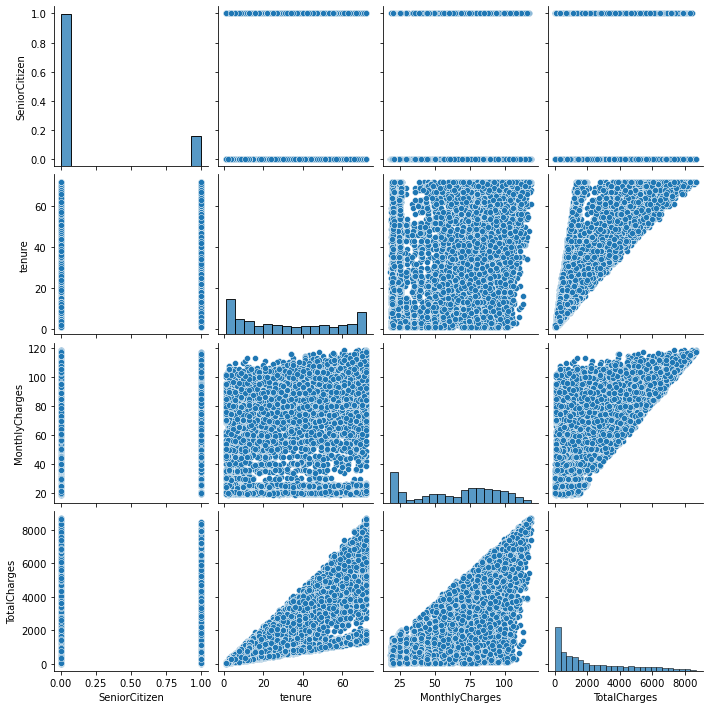

In [12]:
sns.pairplot(df)

### Step - 2: Document the below mentioned points properly:
- Identify the input and output/target variables.
- Identify the type of ML Task.
- Identify the Evaluation Metric.
- For regression task - Mean Absolute Error
- For classification task - Accuracy

#### Identify the input and output/target variables.

In [13]:
y = df['Churn']

X = df.drop('Churn', axis = 'columns')

In [14]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [15]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [16]:
print(X.shape, y.shape)

(7032, 20) (7032,)


### Observation - As per the dataset our task is to find (Customers who left within the last month – the column is called Churn) here's the column have information about customer churn which is Churn so this is our target variable and rest of the columns are input variables

### 2. Identify the type of ML Task.

In [17]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

### Observation - As per the dataset the target variable is Churn which in binary classification (i.e - Yes and No) so here our ML task is classification.

### 3. Identify the Evaluation Metric.

In [18]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

### Observation - As per the observation our ML task is classification so here Evaluation Metric is Accuracy

### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [19]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0) 

In [20]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5274, 20) (5274,)
(1758, 20) (1758,)


### Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


### Separating Categorical and Numerical Columns of Training set:

In [21]:
X_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [22]:
X_train_num = X_train.select_dtypes(include = ['int64','float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3540,0,72,108.65,7726.35
3504,0,68,19.95,1377.70
6715,0,11,89.20,990.30
2866,0,12,84.60,1017.35
6609,0,1,20.10,20.10


In [23]:
# scaling the numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3540,-0.436793,1.628149,1.460662,2.416469
3504,-0.436793,1.464856,-1.495682,-0.392705
6715,-0.436793,-0.862073,0.812400,-0.564123
2866,-0.436793,-0.821250,0.659083,-0.552154
6609,-0.436793,-1.270306,-1.490683,-0.993420


In [24]:
X_train_cat = X_train.select_dtypes(include = ['object'])

X_train_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,1053-MXTTK,Female,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
3504,3678-MNGZX,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
6715,1173-XZPYF,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
2866,7517-LDMPS,Female,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check
6609,1000-AJSLD,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check


In [25]:
X_train_cat.shape

(5274, 16)

In [26]:
# labelencoding to the Categorical Features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train_cat['customerID'] = le.fit_transform(X_train['customerID'])
X_train_cat['gender'] = le.fit_transform(X_train['gender'])
X_train_cat['Partner'] = le.fit_transform(X_train['Partner'])
X_train_cat['Dependents'] = le.fit_transform(X_train['Dependents'])
X_train_cat['PhoneService'] = le.fit_transform(X_train['PhoneService'])
X_train_cat['MultipleLines'] = le.fit_transform(X_train['MultipleLines'])
X_train_cat['InternetService'] = le.fit_transform(X_train['InternetService'])
X_train_cat['OnlineSecurity'] = le.fit_transform(X_train['OnlineSecurity'])
X_train_cat['OnlineBackup'] = le.fit_transform(X_train['OnlineBackup'])
X_train_cat['DeviceProtection'] = le.fit_transform(X_train['DeviceProtection'])
X_train_cat['TechSupport'] = le.fit_transform(X_train['TechSupport'])
X_train_cat['StreamingTV'] = le.fit_transform(X_train['StreamingTV'])
X_train_cat['StreamingMovies'] = le.fit_transform(X_train['StreamingMovies'])
X_train_cat['Contract'] = le.fit_transform(X_train['Contract'])
X_train_cat['PaperlessBilling'] = le.fit_transform(X_train['PaperlessBilling'])
X_train_cat['PaymentMethod'] = le.fit_transform(X_train['PaymentMethod'])

In [27]:
X_train_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,542,0,1,1,1,0,1,2,2,2,2,2,2,2,1,0
3504,1942,1,1,1,1,0,2,1,1,1,1,1,1,2,0,0
6715,610,0,0,0,1,2,1,0,0,2,0,2,0,0,1,2
2866,3994,0,0,0,1,0,1,0,2,0,0,0,2,0,1,2
6609,515,1,0,0,1,0,2,1,1,1,1,1,1,0,1,3


In [28]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat], axis = 1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,-0.436793,1.628149,1.460662,2.416469,542,0,1,1,1,0,1,2,2,2,2,2,2,2,1,0
3504,-0.436793,1.464856,-1.495682,-0.392705,1942,1,1,1,1,0,2,1,1,1,1,1,1,2,0,0
6715,-0.436793,-0.862073,0.812400,-0.564123,610,0,0,0,1,2,1,0,0,2,0,2,0,0,1,2
2866,-0.436793,-0.821250,0.659083,-0.552154,3994,0,0,0,1,0,1,0,2,0,0,0,2,0,1,2
6609,-0.436793,-1.270306,-1.490683,-0.993420,515,1,0,0,1,0,2,1,1,1,1,1,1,0,1,3


### Step - 5: Data preparation on train data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

In [29]:
X_test_num = X_test.select_dtypes(include = ['int64','float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5561,0,1,20.65,20.65
5814,0,16,20.60,330.25
2645,0,1,19.80,19.80
3983,0,1,24.25,24.25
6438,1,1,74.40,74.40


In [30]:
# Scaling the Numericals Features for test

X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5561,-0.436793,-1.270306,-1.472352,-0.993177
5814,-0.436793,-0.657957,-1.474018,-0.856184
2645,-0.436793,-1.270306,-1.500682,-0.993553
3983,-0.436793,-1.270306,-1.352365,-0.991584
6438,2.289415,-1.270306,0.319120,-0.969394


In [31]:
X_test_cat = X_test.select_dtypes(include = ['object'])

X_test_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5561,5088-QZLRL,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check
5814,0787-LHDYT,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic)
2645,8562-GHPPI,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic)
3983,1334-FJSVR,Male,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
6438,3551-HUAZH,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [32]:
# labelencoding to the Categorical Features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_test_cat['customerID'] = le.fit_transform(X_test['customerID'])
X_test_cat['gender'] = le.fit_transform(X_test['gender'])
X_test_cat['Partner'] = le.fit_transform(X_test['Partner'])
X_test_cat['Dependents'] = le.fit_transform(X_test['Dependents'])
X_test_cat['PhoneService'] = le.fit_transform(X_test['PhoneService'])
X_test_cat['MultipleLines'] = le.fit_transform(X_test['MultipleLines'])
X_test_cat['InternetService'] = le.fit_transform(X_test['InternetService'])
X_test_cat['OnlineSecurity'] = le.fit_transform(X_test['OnlineSecurity'])
X_test_cat['OnlineBackup'] = le.fit_transform(X_test['OnlineBackup'])
X_test_cat['DeviceProtection'] = le.fit_transform(X_test['DeviceProtection'])
X_test_cat['TechSupport'] = le.fit_transform(X_test['TechSupport'])
X_test_cat['StreamingTV'] = le.fit_transform(X_test['StreamingTV'])
X_test_cat['StreamingMovies'] = le.fit_transform(X_test['StreamingMovies'])
X_test_cat['Contract'] = le.fit_transform(X_test['Contract'])
X_test_cat['PaperlessBilling'] = le.fit_transform(X_test['PaperlessBilling'])
X_test_cat['PaymentMethod'] = le.fit_transform(X_test['PaymentMethod'])

In [33]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis = 1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5561,-0.436793,-1.270306,-1.472352,-0.993177,882,1,0,0,1,0,2,1,1,1,1,1,1,0,0,2
5814,-0.436793,-0.657957,-1.474018,-0.856184,130,1,0,0,1,0,2,1,1,1,1,1,1,0,1,1
2645,-0.436793,-1.270306,-1.500682,-0.993553,1502,0,0,0,1,0,2,1,1,1,1,1,1,0,0,1
3983,-0.436793,-1.270306,-1.352365,-0.991584,228,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2
6438,2.289415,-1.270306,0.319120,-0.969394,605,1,0,0,1,2,1,0,0,0,0,0,0,0,1,2


### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest

### Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy(actual, predict).

In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

### 1. KNN classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_transformed, y_train)

y_test_pred = knn.predict(X_test_transformed)

y_train_pred = knn.predict(X_train_transformed)

knn_ac_test = accuracy_score(y_test, y_test_pred)

knn_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", knn_ac_train)
print("Test Accuracy ", knn_ac_test)

Training Accuracy :  0.8031854379977247
Test Accuracy  0.6939704209328783


### 2. Logestic Regresion

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_transformed, y_train)

y_test_pred = lr.predict(X_test_transformed)

y_train_pred = lr.predict(X_train_transformed)

lr_ac_test = accuracy_score(y_test, y_test_pred)

lr_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", lr_ac_train)
print("Test Accuracy ", lr_ac_test)

Training Accuracy :  0.7997724687144482
Test Accuracy  0.7918088737201365


### 3. Support Vector Machine

In [37]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train_transformed, y_train)

y_test_pred = svm.predict(X_test_transformed)

y_train_pred = svm.predict(X_train_transformed)

svm_ac_test = accuracy_score(y_test, y_test_pred)

svm_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", svm_ac_train)
print("Test Accuracy ", svm_ac_test)

Training Accuracy :  0.7303754266211604
Test Accuracy  0.7457337883959044


### 4. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train_transformed, y_train)

y_test_pred = dt.predict(X_test_transformed)

y_train_pred = dt.predict(X_train_transformed)

dt_ac_test = accuracy_score(y_test, y_test_pred)

dt_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", dt_ac_train)
print("Test Accuracy ", dt_ac_test)

Training Accuracy :  1.0
Test Accuracy  0.7093287827076223


### 5. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_transformed, y_train)

y_test_pred = rf.predict(X_test_transformed)

y_train_pred = rf.predict(X_train_transformed)

rf_ac_test = accuracy_score(y_test, y_test_pred)

rf_ac_train = accuracy_score(y_train, y_train_pred)

print("Training Accuracy : ", rf_ac_train)
print("Test Accuracy ", rf_ac_test)

Training Accuracy :  1.0
Test Accuracy  0.7866894197952219


### Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction

In [41]:
x = {'K Nearest Neighbour': knn_ac_test, 'Logistic Regression' : lr_ac_test, 'Support Vector Machine' : svm_ac_test, 'Decision tree' : dt_ac_test, 'Random Forest' : rf_ac_test}

x

{'K Nearest Neighbour': 0.6939704209328783,
 'Logistic Regression': 0.7918088737201365,
 'Support Vector Machine': 0.7457337883959044,
 'Decision tree': 0.7093287827076223,
 'Random Forest': 0.7866894197952219}

In [42]:
accuracy = pd.DataFrame.from_dict(x, orient ='index', columns = ['accuracy'])

accuracy

,accuracy
K Nearest Neighbour,0.693970
Logistic Regression,0.791809
Support Vector Machine,0.745734
Decision tree,0.709329
Random Forest,0.786689


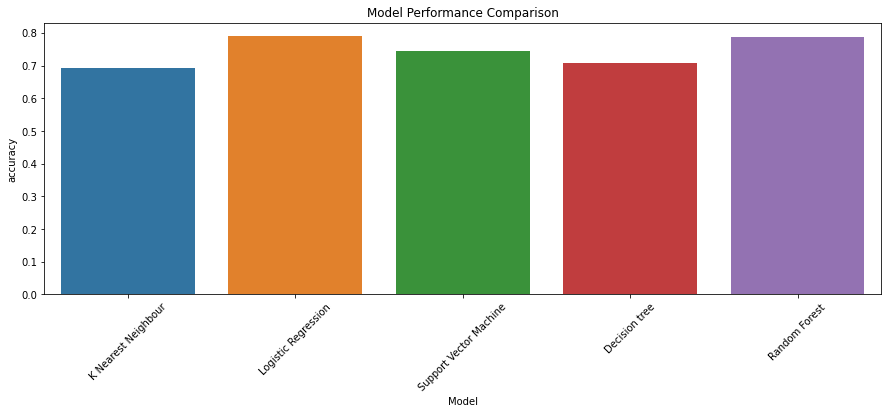

In [43]:
plt.figure(figsize=(15,5))

sns.barplot(x = accuracy.index , y = accuracy['accuracy'])

plt.title('Model Performance Comparison')

plt.xlabel('Model')

plt.xticks(rotation=45)

plt.show()

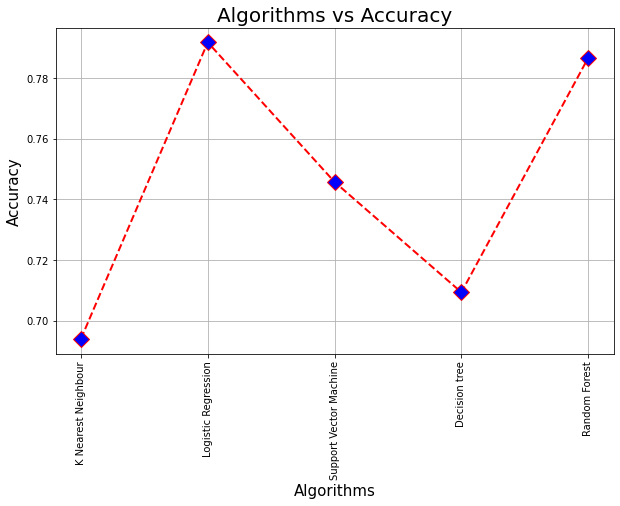

In [45]:
plt.figure(figsize=(10,6))

plt.title("Algorithms vs Accuracy", fontsize=20)

plt.plot(accuracy.index, accuracy['accuracy'], label = "line", linestyle='dashed', linewidth=2, marker ='D', markerfacecolor='blue', markersize=12,color='Red')

plt.xlabel("Algorithms", fontsize=15)

plt.ylabel("Accuracy", fontsize=15)

plt.xticks(rotation = 90)

plt.grid()

plt.show()

### Conclusion - As per the above bar plot of all the models accurcay comaparison Logestic Regression has given the best accuracy on the Customer Churn Dataset and it is the best algorithm to identify a customers who left within the last month.